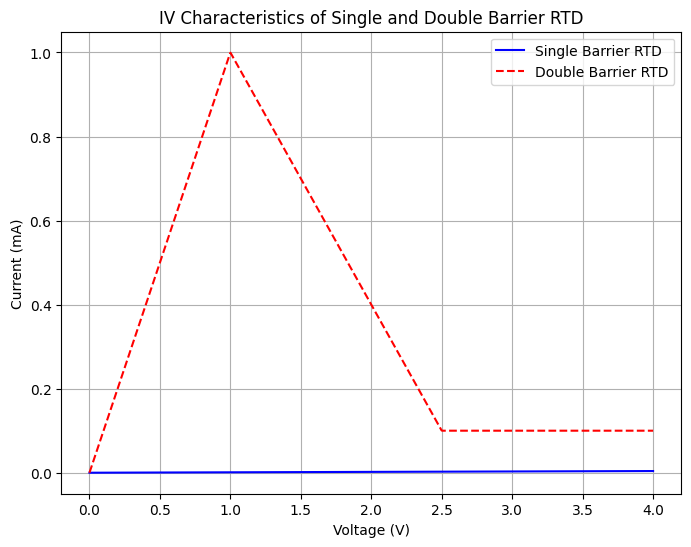

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the voltage range (0 to 4V)
voltage = np.linspace(0, 4, 1000)  # 1000 points between 0 and 4V

# Define the IV characteristics for a single barrier RTD
def single_barrier_current(voltage):
    return 1e-3 * voltage  # Simple linear relationship (current in mA)

# Define the IV characteristics for a double barrier RTD with NDR
def double_barrier_current(voltage):
    I_peak = 1.0  # Peak current (mA)
    V_peak = 1.0  # Voltage at peak current (V)
    V_valley = 2.5  # Voltage at valley (NDR region) (V)
    I_valley = 0.1  # Valley current (mA)

    current = np.zeros_like(voltage)
    for i, V in enumerate(voltage):
        if V <= V_peak:
            # Before the peak, the current rises
            current[i] = I_peak * (V / V_peak)
        elif V <= V_valley:
            # Between the peak and the valley, the current decreases
            current[i] = I_peak - (I_peak - I_valley) * ((V - V_peak) / (V_valley - V_peak))
        else:
            # After the valley, the current stays constant at the valley current
            current[i] = I_valley
    return current

# Calculate the current for both RTD types
current_single_barrier = single_barrier_current(voltage)
current_double_barrier = double_barrier_current(voltage)

# Plot the IV characteristics
plt.figure(figsize=(8, 6))
plt.plot(voltage, current_single_barrier, label='Single Barrier RTD', color='blue')
plt.plot(voltage, current_double_barrier, label='Double Barrier RTD', color='red', linestyle='--')

# Add labels and title
plt.title('IV Characteristics of Single and Double Barrier RTD')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
